In [3]:
source labash/miniconda3/bin/activate

SyntaxError: invalid syntax (2790828139.py, line 1)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from miscellaneous import *


def calculate_PRC_mean(model,simulation,neuron,version=None):
    if version is not None:
        
        x = np.load('output/{}/PRC_data/lstm_states_{}_model_eps:{}.h5.npy'.format(model,simulation,version))
    else:
        x = np.load('output/{}/lstm_states_{}.npy'.format(model,simulation))
    x = x.mean(axis=0)
    
    yt = x[:,neuron]
    
    difference = yt[1:]-yt[:-1]
    if version is not None:
        z= np.zeros(319)
        z.fill(version)
    else:
        z = np.zeros(320)
        for j in range(1,8):
            z[j*40:j*40+40]=j
        z = z[:-1]
        z = z*40
    return yt[1:],difference,z

def calculate_PRC(model,simulation,neuron):
    x = np.load('output/{}/lstm_states_{}.npy'.format(model,simulation))
    
    yt = x[:,:,neuron]
    print(yt.shape)
    difference = yt[:,1:]-yt[:,:-1]
    
    z = np.zeros((yt.shape[0],320))
    for j in range(1,8):
        z[:,j*40:j*40+40]=j
    z = z[:,:-1]
    z = z*40
    return yt[:,1:],difference,z

In [2]:
def Plot_PRC_versions(model,simulation,day,neuron):
    #Getting available mid-point
    versions = Get_LSTM_Files(model,simulation)
    v = len(versions)
    yt = np.zeros((v,319))
    difference = np.zeros((v,319))
    z = np.zeros((v,319))
    number = np.zeros(v)
    for i in range(34,v):#0,v,10):
        print('Reading model:{}'.format(i))
        yt[i],difference[i],z[i] = calculate_PRC_mean(model,simulation,neuron,version=versions[i])
        number[i]= versions[i]
    
    #Generate 8 colors
    colors = plt.cm.jet(np.linspace(0,1,v))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    wday_start = 40*day-1
    wday_end= wday_start+40
    #for i in range(v):
    #    ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    #ax = fig.add_subplot(2,1,2, projection='3d')
    for i in range(v):
        ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    plt.show()

In [5]:
one = np.load('output/{}/PRC_data/lstm_states_{}_model_eps:{}.h5.npy'.format(64,0,versions[0]))

In [6]:
lst_states = np.zeros([len(versions),one.shape[0],one.shape[1],one.shape[2]])

In [3]:
for simulation in range(1,21):
    versions = Get_LSTM_Files(64,simulation)
    for i in range(len(versions)):
        print(i,versions[i])
        one = np.load('output/{}/PRC_data/lstm_states_{}_model_eps:{}.h5.npy'.format(64,simulation,versions[i])) 
        lst_states[i] = one
        del one
        gc.collect()
np.save('{}/{}/PRC_data/BI_lstm_states_{}'.format('output',64,simulation),lst_states)

0 100


NameError: name 'lst_states' is not defined

In [ ]:
print('hi')

In [15]:
np.save('{}/{}/PRC_data/BI_lstm_states_{}'.format('output',64,0),lst_states)

In [4]:
x = np.load('{}/{}/PRC_data/BI_lstm_states_{}'.format('output',64,0))

FileNotFoundError: [Errno 2] No such file or directory: 'output/64/PRC_data/BI_lstm_states_0'

Reading model:34
Reading model:35
Reading model:36
Reading model:37
Reading model:38
Reading model:39
Reading model:40
Reading model:41
Reading model:42
Reading model:43
Reading model:44
Reading model:45
Reading model:46
Reading model:47
Reading model:48
Reading model:49
Reading model:50
Reading model:51
Reading model:52
Reading model:53
Reading model:54
Reading model:55
Reading model:56
Reading model:57
Reading model:58
Reading model:59
Reading model:60
Reading model:61
Reading model:62
Reading model:63
Reading model:64
Reading model:65
Reading model:66
Reading model:67
Reading model:68
Reading model:69
Reading model:70
Reading model:71
Reading model:72
Reading model:73
Reading model:74
Reading model:75
Reading model:76
Reading model:77
Reading model:78
Reading model:79
Reading model:80
Reading model:81
Reading model:82
Reading model:83
Reading model:84
Reading model:85
Reading model:86
Reading model:87
Reading model:88
Reading model:89
Reading model:90
Reading model:91
Reading model:

<IPython.core.display.Javascript object>


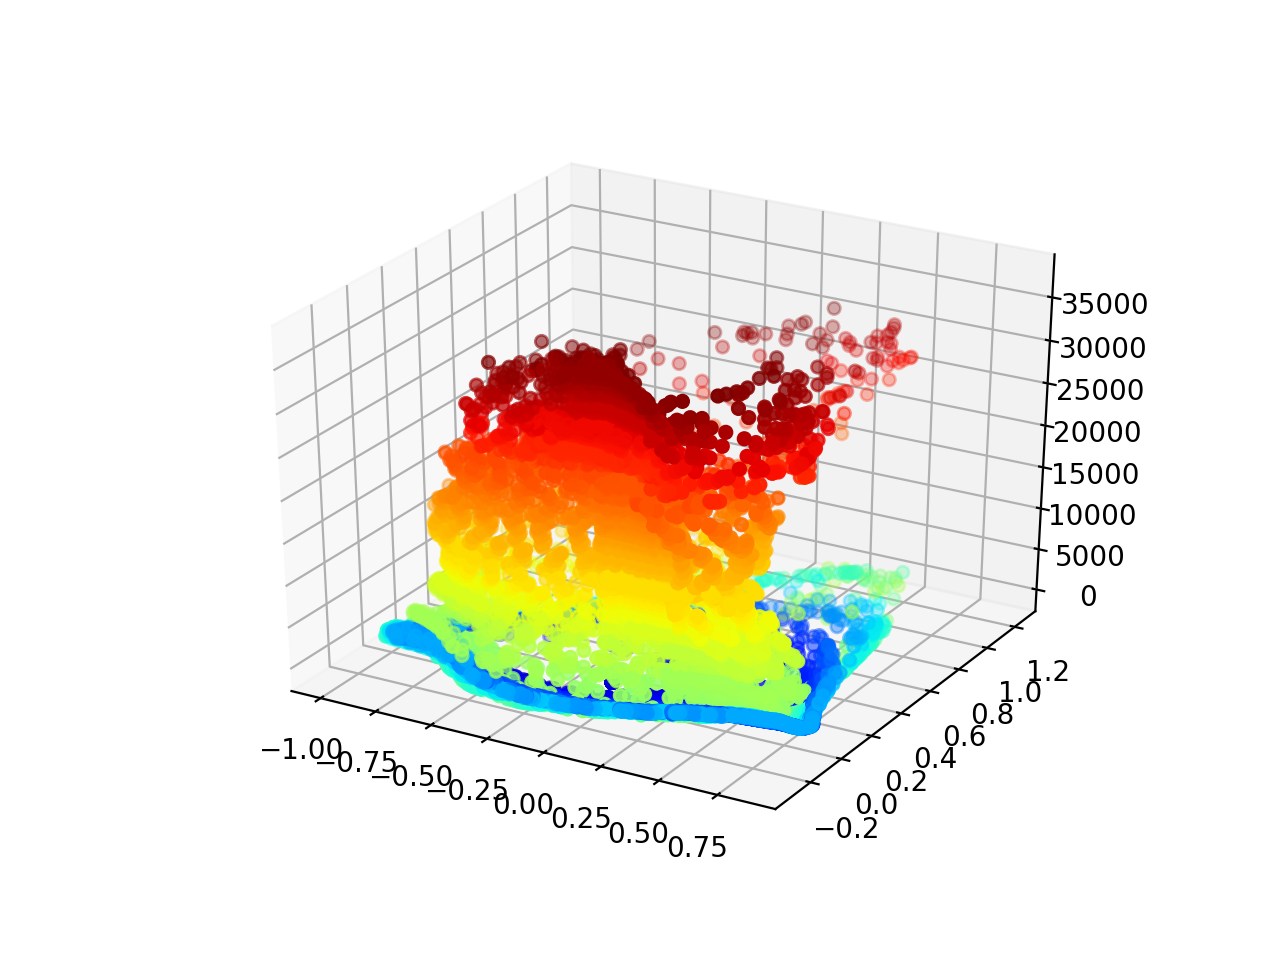

In [12]:
Plot_PRC_versions(202,0,5,43)

<IPython.core.display.Javascript object>


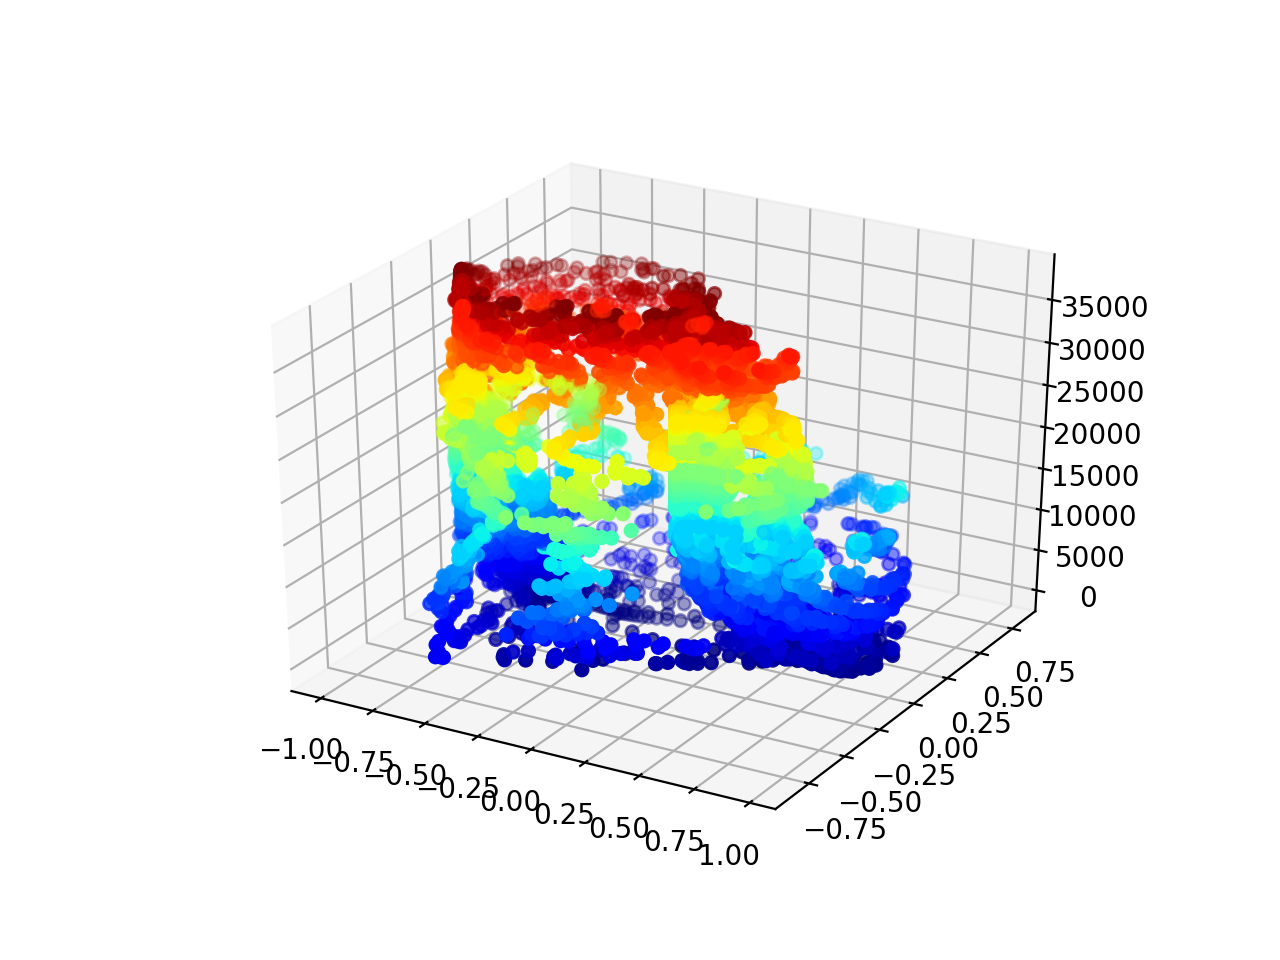

In [4]:
Plot_PRC_versions(205,0,5,43)


#ax.plot(yt[0],difference[0],z[0],color=colors[i])
x = np.zeros(319)
x.fill(-0.4)
y = np.zeros(319)
#ax.plot(x,y,z,'--')#,color='r')

<IPython.core.display.Javascript object>


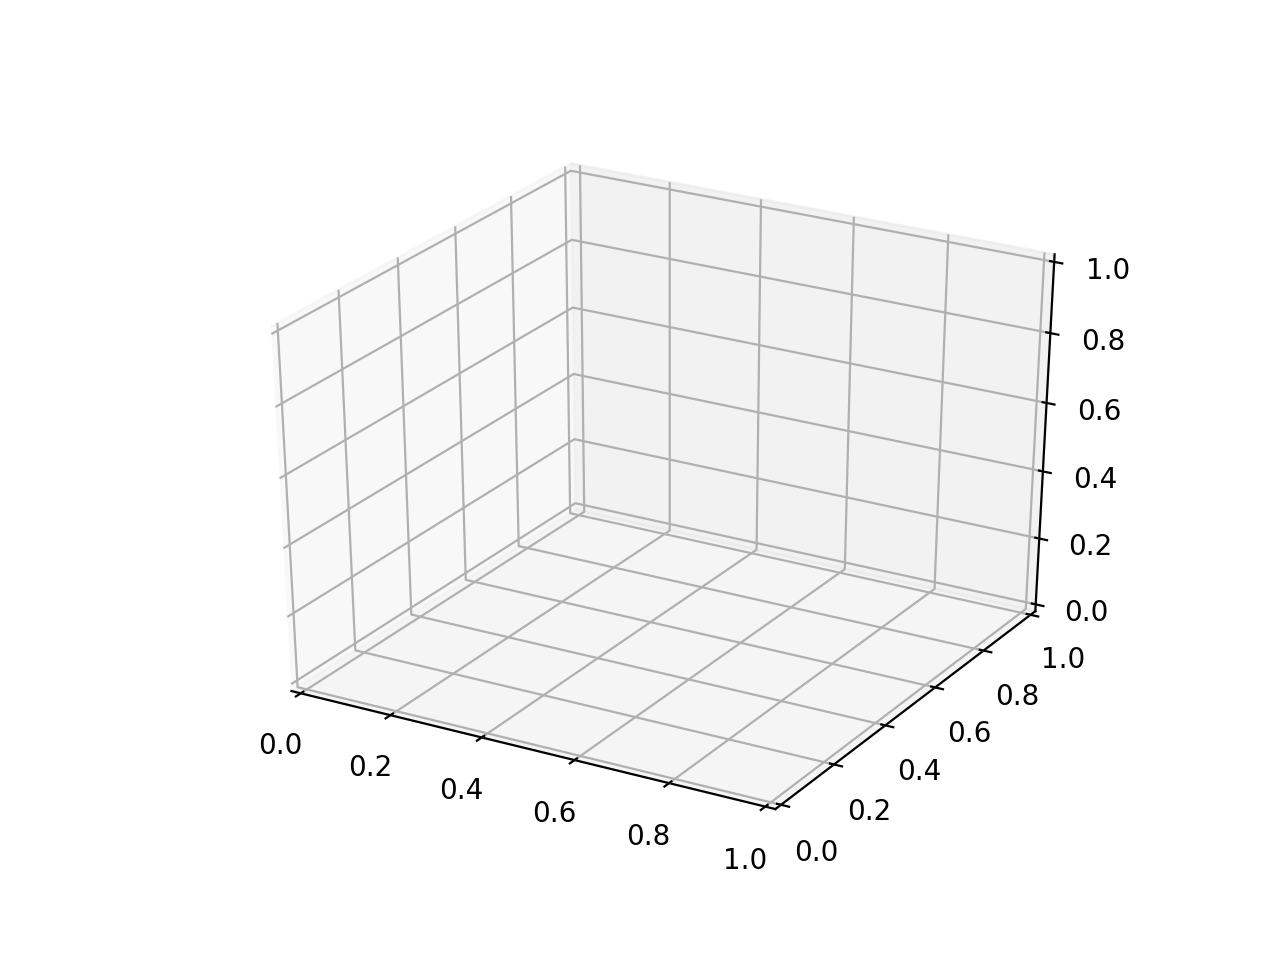

In [5]:
Plot_PRC_versions(202,0,5,43)

In [14]:
def calculate_PRC(model,simulation,neuron):
    x = np.load('output/{}/lstm_states_{}.npy'.format(model,simulation))
    
    yt = x[:,:,neuron]
    yt = yt.mean(axis=0)
    
    
    difference = yt[1:]-yt[:-1]
    print(yt.shape,difference.shape)
    assert False
    z = np.zeros((yt.shape[0],320))
    for j in range(1,8):
        z[:,j*40:j*40+40]=j
    z = z[:,:-1]
    z = z*40
    return yt[:,1:],difference,z

In [15]:
calculate_PRC(202,0,0)

(320,) (319,)


AssertionError: 

In [6]:
lstm_data = np.load('output/202/lstm_states_0.npy').mean(axis=0)
yt = np.zeros(319)
difference = np.zeros(319)

In [7]:
yt = lstm_data[:-1]
difference = lstm_data[1:] - yt

In [10]:
difference.shape

(319, 128)

<IPython.core.display.Javascript object>


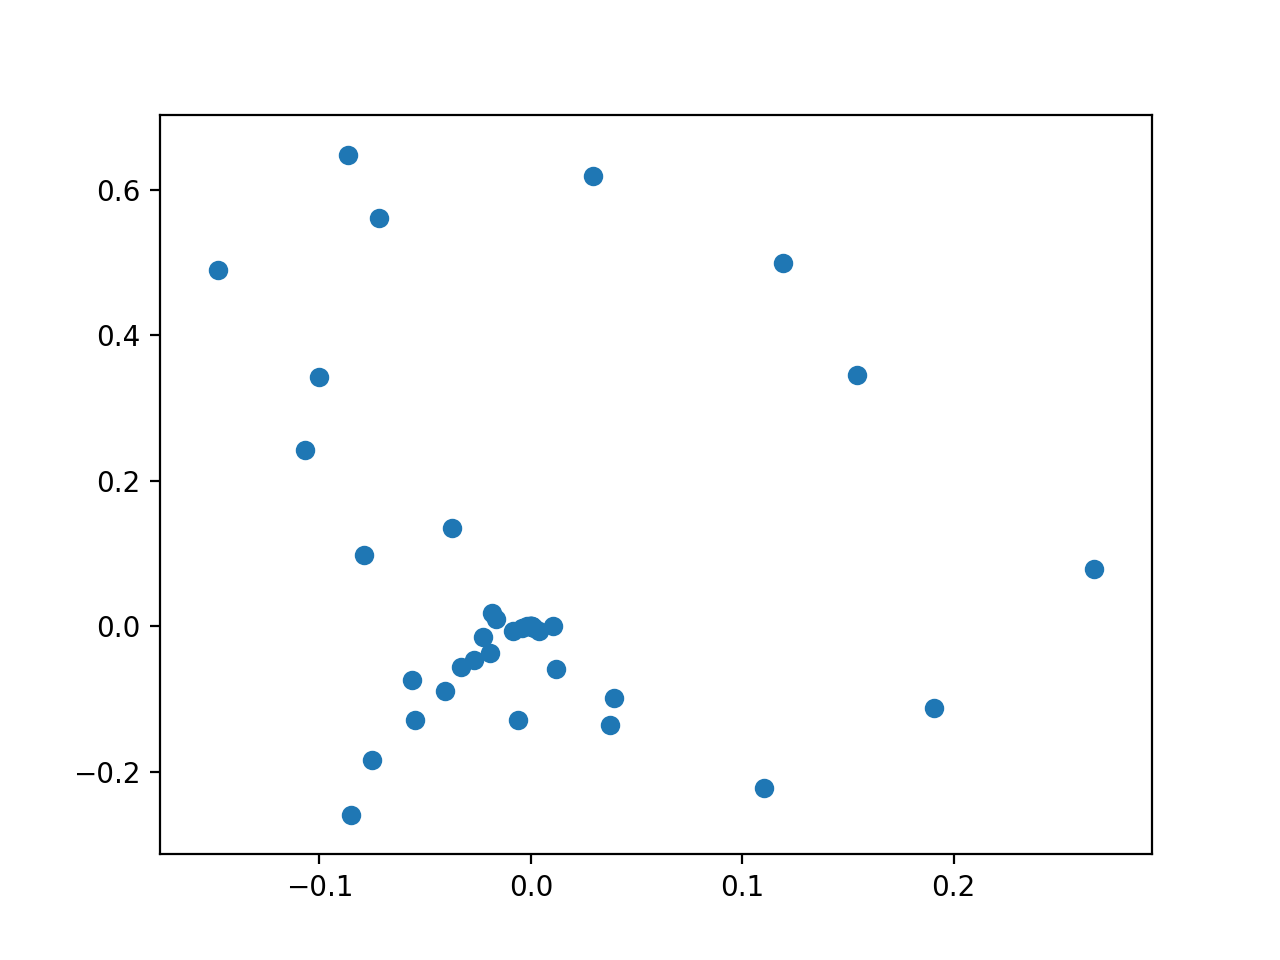

In [18]:
d_s = 40
d_e = 80
n = 5
plt.scatter(difference[d_s:d_e,n],yt[d_s:d_e,n])

In [ ]:
    v = len(versions)
    yt = np.zeros((v,319))
    difference = np.zeros((v,319))
    z = np.zeros((v,319))
    number = np.zeros(v)
    for i in range(v):#0,v,10):
        yt[i],difference[i],z[i] = calculate_PRC_mean(64,0,neuron,version=versions[i])
        number[i]= versions[i]
    
    #Generate 8 colors
    colors = plt.cm.jet(np.linspace(0,1,v))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    wday_start = 40*day-1
    wday_end= wday_start+40
    #for i in range(v):
    #    ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    #ax = fig.add_subplot(2,1,2, projection='3d')
    for i in range(v):
        ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#for i in range(8):
    

for i in range(8):
    ax.plot(yt[i*40:i*40+40],difference[i*40:i*40+40],z[i*40:i*40+40],color=colors[i])
x = np.zeros(319)
x.fill(-0.4)
y = np.zeros(319)
ax.plot(x,y,z,'--')#,color='r')
#plt.axis('off')